In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_table("Data.data",delimiter=",")

In [ ]:
df.head()

,SL,SW,PL,PW,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(df)

      SL   SW   PL   PW           Class
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
for col in df.columns:
    df[col].replace({'Iris-setosa':1},inplace=True)
    df[col].replace({'Iris-versicolor':0},inplace=True)
    df[col].replace({'Iris-virginica':2},inplace=True)

In [ ]:
df.head()

,SL,SW,PL,PW,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
print(df.head())

    SL   SW   PL   PW  Class
0  5.1  3.5  1.4  0.2      1
1  4.9  3.0  1.4  0.2      1
2  4.7  3.2  1.3  0.2      1
3  4.6  3.1  1.5  0.2      1
4  5.0  3.6  1.4  0.2      1


<Axes: >

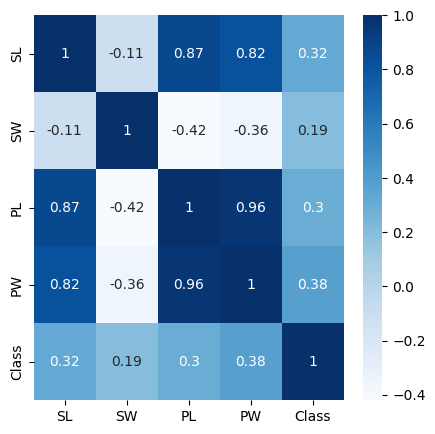

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
x = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=x_train
Y_train=y_train
X_test=x_test
Y_test=y_test

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
ANN_Sklearn =  MLPClassifier(random_state=1, max_iter=300)
ANN_Sklearn.fit(X_train, Y_train)
Y_pred_Sklearn = ANN_Sklearn.predict(X_test)
Accuracy_Sklearn = accuracy_score(Y_pred_Sklearn, Y_test)
print('Accuracy Score:', Accuracy_Sklearn)

Accuracy Score: 1.0


In [ ]:
x_train.shape

(120, 4)

In [ ]:
pip install tensorflow

In [ ]:
# Import Packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = y
features = x
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
     keras.layers.Dense(7, activation='softmax')
])

model.build((120,4))
# Compile the Model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [ ]:
#train the model using the training set
history = model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
4/4 [==============================] - 1s 5ms/step - loss: 2.1134 - accuracy: 0.0333
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 1.7353 - accuracy: 0.3250
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 1.4669 - accuracy: 0.3250
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 1.2755 - accuracy: 0.3250
Epoch 5/20
4/4 [==============================] - 0s 6ms/step - loss: 1.1481 - accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 0s 6ms/step - loss: 1.0528 - accuracy: 0.6500
Epoch 7/20
4/4 [==============================] - 0s 6ms/step - loss: 0.9850 - accuracy: 0.6917
Epoch 8/20
4/4 [==============================] - 0s 6ms/step - loss: 0.9344 - accuracy: 0.8417
Epoch 9/20
4/4 [==============================] - 0s 6ms/step - loss: 0.8918 - accuracy: 0.9250
Epoch 10/20
4/4 [==============================] - 0s 6ms/step - loss: 0.8533 - accuracy: 0.8833
Epoch 11/20
4/4 [======================

In [ ]:
#use the model to do prediction with
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

4/4 [==============================] - 0s 6ms/step - loss: 0.6059 - accuracy: 0.9083
Training Accuracy: 90.83%

1/1 [==============================] - 0s 28ms/step - loss: 0.5887 - accuracy: 0.9333
Testing Accuracy: 93.33%



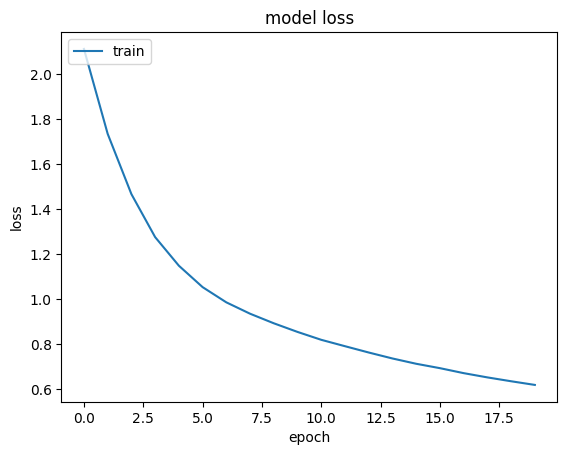

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#spilt training set into training and validation set and fit a model
history = model.fit(X_train, y_train,validation_split = 0.1,
                    epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 0s 28ms/step - loss: 0.5967 - accuracy: 0.9167 - val_loss: 0.6361 - val_accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5824 - accuracy: 0.9630 - val_loss: 0.6258 - val_accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5737 - accuracy: 0.8981 - val_loss: 0.6172 - val_accuracy: 0.9167
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 0.5545 - accuracy: 0.9074 - val_loss: 0.6072 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.5436 - accuracy: 0.9352 - val_loss: 0.5989 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5322 - accuracy: 0.9537 - val_loss: 0.5879 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.5207 - accuracy: 0.9630 - val_loss: 0.5762 - val_accuracy: 1.0000
Epoch 8/100
4/4 [===

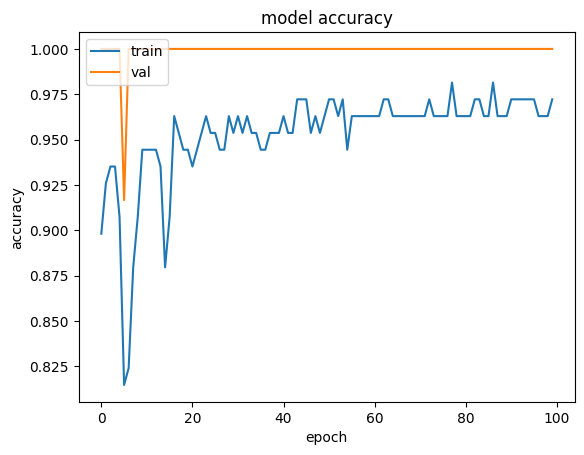

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Hyper Parameter Tuning

In [ ]:
# Import Packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = y
features = x
model = keras.Sequential([
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(7, activation='softmax')
])

model.build((120,4))
# Compile the Model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [ ]:
#spilt training set into training and validation set and fit a model
history = model.fit(X_train, y_train,validation_split = 0.1,
                    epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 2s 111ms/step - loss: 5.5501 - accuracy: 0.2778 - val_loss: 0.9561 - val_accuracy: 0.5833
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 4.5742 - accuracy: 0.5370 - val_loss: 0.7241 - val_accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 27ms/step - loss: 3.3092 - accuracy: 0.6852 - val_loss: 0.6013 - val_accuracy: 0.8333
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 3.1678 - accuracy: 0.6481 - val_loss: 0.5644 - val_accuracy: 0.5833
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 3.0674 - accuracy: 0.6296 - val_loss: 0.4611 - val_accuracy: 0.7500
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 4.1526 - accuracy: 0.5833 - val_loss: 0.4099 - val_accuracy: 0.8333
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 3.0581 - accuracy: 0.6944 - val_loss: 0.3601 - val_accuracy: 1.0000
Epoch 8/100
4/4 [==

In [ ]:
#use the model to do prediction with
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

4/4 [==============================] - 0s 7ms/step - loss: 0.0922 - accuracy: 0.9667
Training Accuracy: 96.67%

1/1 [==============================] - 0s 84ms/step - loss: 0.0859 - accuracy: 0.9667
Testing Accuracy: 96.67%



#Prevention of overfitting

In [ ]:
# Import Packages

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = y
features = x
model = keras.Sequential([
     keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
     keras.layers.Dense(7, activation='softmax')
])


model.build((120,4))
# Compile the Model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [ ]:
#spilt training set into training and validation set and fit a model
history = model.fit(X_train, y_train,validation_split = 0.1,
                    epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 1s 76ms/step - loss: 1.6157 - accuracy: 0.3241 - val_loss: 1.0420 - val_accuracy: 0.5833
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 0.9398 - accuracy: 0.6389 - val_loss: 0.7575 - val_accuracy: 0.5833
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 0.6677 - accuracy: 0.7130 - val_loss: 0.6269 - val_accuracy: 0.5833
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 0.5360 - accuracy: 0.6944 - val_loss: 0.4734 - val_accuracy: 0.9167
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 0.4122 - accuracy: 0.7685 - val_loss: 0.3663 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 23ms/step - loss: 0.3631 - accuracy: 0.8241 - val_loss: 0.2797 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 0.3684 - accuracy: 0.7963 - val_loss: 0.3037 - val_accuracy: 0.9167
Epoch 8/100
4/4 [===

In [ ]:
#use the model to do prediction with
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

4/4 [==============================] - 0s 7ms/step - loss: 0.0583 - accuracy: 0.9833
Training Accuracy: 98.33%

1/1 [==============================] - 0s 48ms/step - loss: 0.0829 - accuracy: 0.9667
Testing Accuracy: 96.67%

